In [107]:
import glob
import json
from pathlib import Path
from pprint import pprint as pp

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 999)

In [14]:
datadir = Path('../data')
train_sentiment_dir = datadir / 'train_sentiment'

In [18]:
filepaths = list(train_sentiment_dir.glob('*.json'))

In [55]:
ids = []
scores = []
magnitudes = []

In [56]:
for filepath in filepaths:
    ids.append(filepath.stem)
    with open(filepath) as f:
        data = json.load(f)
        scores.append(data['documentSentiment']['score'])
        magnitudes.append(data['documentSentiment']['magnitude'])

In [57]:
sentiments = pd.DataFrame(data={
    'id': ids,
    'score': scores,
    'magnitude': magnitudes
})

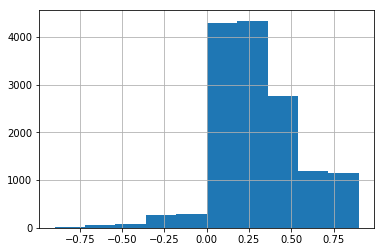

In [58]:
sentiments.score.hist()

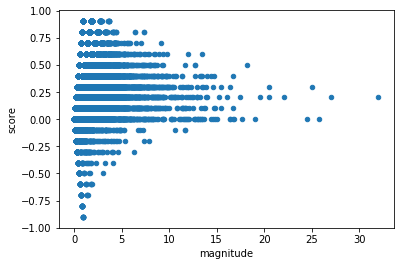

In [65]:
sentiments.plot(x='magnitude', y='score', kind='scatter')

In [68]:
with open(filepaths[100]) as f:
    data = json.load(f)
    pet_id = filepaths[100].stem

In [69]:
pp(data)

{'categories': [],
 'documentSentiment': {'magnitude': 1.9, 'score': 0.9},
 'entities': [{'mentions': [{'text': {'beginOffset': -1, 'content': 'people'},
                             'type': 'COMMON'}],
               'metadata': {},
               'name': 'people',
               'salience': 0.2371696,
               'type': 'PERSON'},
              {'mentions': [{'text': {'beginOffset': -1, 'content': 'Loves'},
                             'type': 'COMMON'}],
               'metadata': {},
               'name': 'Loves',
               'salience': 0.2371696,
               'type': 'OTHER'},
              {'mentions': [{'text': {'beginOffset': -1, 'content': 'sleep'},
                             'type': 'COMMON'}],
               'metadata': {},
               'name': 'sleep',
               'salience': 0.23434643,
               'type': 'OTHER'},
              {'mentions': [{'text': {'beginOffset': -1, 'content': 'arms'},
                             'type': 'COMMON'}],
            

In [70]:
pet_id

'6607c6e22'

In [71]:
train_metadata_dir = datadir / 'train_metadata'

In [75]:
filepaths = list(train_metadata_dir.glob('*.json'))

In [76]:
with open(filepaths[100]) as f:
    data = json.load(f)
    pet_id = filepaths[100].stem

In [84]:
df = pd.DataFrame(data['labelAnnotations'])
df['pet_id'] = pet_id
df.set_index('mid')

,description,score,topicality,pet_id
mid,,,,
/m/0bt9lr,dog,0.963591,0.963591,7133c0c97-2
/m/01z5f,dog like mammal,0.943229,0.943229,7133c0c97-2
/m/0kpmf,dog breed,0.933919,0.933919,7133c0c97-2
/m/02xl47d,dog breed group,0.884401,0.884401,7133c0c97-2
/m/071jj,siberian husky,0.806374,0.806374,7133c0c97-2
/m/05mqq3,snout,0.655770,0.655770,7133c0c97-2
/m/01lrl,carnivoran,0.591264,0.591264,7133c0c97-2
/m/0d7s3w,puppy,0.560894,0.560894,7133c0c97-2


In [87]:
dfs = []
for filepath in train_metadata_dir.glob('*.json'):
    with open(filepath) as f:
        data = json.load(f)
        try:
            df = pd.DataFrame(data['labelAnnotations'])
            df['pet_id'] = filepath.stem
            dfs.append(df)
        except KeyError:
            continue

In [88]:
len(filepaths)

58311

In [89]:
len(dfs)

58299

In [92]:
metadata = pd.concat(dfs)

In [95]:
metadata.set_index('mid', inplace=True)

In [96]:
metadata.head()

,description,score,topicality,pet_id
mid,,,,
/m/035qhg,fauna,0.923040,0.923040,6afe7ee11-3
/m/06z_nw,tail,0.780109,0.780109,6afe7ee11-3
/m/02xl47d,dog breed group,0.741457,0.741457,6afe7ee11-3
/m/01l7qd,whiskers,0.692394,0.692394,6afe7ee11-3
/m/0cnmr,fur,0.665386,0.665386,6afe7ee11-3


In [109]:
metadata.groupby('description')['score'].agg(np.mean).sort_values(ascending=False)

description
donskoy                  0.979222
land vehicle             0.979199
cat                      0.978604
hair                     0.972491
blue                     0.968266
people                   0.964814
red                      0.963095
clothing                 0.961446
white                    0.959890
face                     0.956928
black                    0.953421
dog                      0.952255
photograph               0.952117
aqua                     0.949858
green                    0.945736
hammock                  0.941746
nature                   0.941083
facial expression        0.938991
skin                     0.931678
pink                     0.930544
footwear                 0.929497
yellow                   0.925531
dog breed                0.925070
mammal                   0.924232
road bicycle             0.921476
washing machine          0.916307
office chair             0.916020
woody plant              0.915517
meal                     0.914501
mo